In [61]:
import pandas as pd
from pycaret import *

df = pd.read_csv('Data/diabetes_prediction_dataset.csv')

df.info()

class_counts = df['diabetes'].value_counts()

print("\nContagem das Classes na Coluna 'diabetes':")
print(f"Classe 0 (Não diabético): {class_counts[0]}")
print(f"Classe 1 (Diabético): {class_counts[1]}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB

Contagem das Classes na Coluna 'diabetes':
Classe 0 (Não diabético): 91500
Classe 1 (Diabético): 8500


In [56]:
from sklearn.utils import resample
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# Separar classes
class_majority = df[df['diabetes'] == 0]
class_minority = df[df['diabetes'] == 1]

# Subamostrar a classe majoritária
class_majority_downsampled = resample(class_majority,
                                      replace=False,
                                      n_samples=len(class_minority),
                                      random_state=42)

# Combinar classes
df = pd.concat([class_majority_downsampled, class_minority])


In [57]:
from pycaret.classification import *

# Criação do objeto de experimento
exp = ClassificationExperiment()

# Inicialização do setup no objeto
exp.setup(df, target='diabetes', session_id=123)

# Comparar modelos
best = exp.compare_models()
best_tuned = exp.tune_model(best)
print(best_tuned)

,Description,Value
0,Session id,123
1,Target,diabetes
2,Target type,Binary
3,Original data shape,"(17000, 9)"
4,Transformed data shape,"(17000, 16)"
5,Transformed train set shape,"(11900, 16)"
6,Transformed test set shape,"(5100, 16)"
7,Numeric features,6
8,Categorical features,2
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.9134,0.9790,0.9173,0.9104,0.9137,0.8267,0.8270,0.0740
gbc,Gradient Boosting Classifier,0.9129,0.9796,0.9225,0.9054,0.9138,0.8259,0.8263,0.1600
lightgbm,Light Gradient Boosting Machine,0.9097,0.9779,0.9161,0.9047,0.9103,0.8195,0.8197,0.1870
rf,Random Forest Classifier,0.9013,0.9722,0.9040,0.8993,0.9016,0.8027,0.8028,0.1320
et,Extra Trees Classifier,0.8952,0.9643,0.8982,0.8931,0.8955,0.7904,0.7906,0.1290
lda,Linear Discriminant Analysis,0.8862,0.9617,0.8771,0.8935,0.8851,0.7724,0.7729,0.0190
ridge,Ridge Classifier,0.8861,0.9617,0.8770,0.8935,0.8850,0.7723,0.7727,0.0210
lr,Logistic Regression,0.8851,0.9629,0.8834,0.8866,0.8848,0.7703,0.7706,0.6630
dt,Decision Tree Classifier,0.8773,0.8774,0.8768,0.8779,0.8772,0.7546,0.7548,0.0220
svm,SVM - Linear Kernel,0.8760,0.9612,0.8467,0.9029,0.8712,0.7519,0.7571,0.0340


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9059,0.9771,0.9210,0.8940,0.9073,0.8118,0.8121
1,0.9042,0.9776,0.8941,0.9125,0.9032,0.8084,0.8086
2,0.9101,0.9788,0.9378,0.8885,0.9125,0.8202,0.8214
3,0.9008,0.9751,0.9193,0.8865,0.9026,0.8017,0.8022
4,0.9143,0.9795,0.9277,0.9034,0.9154,0.8286,0.8289
5,0.9034,0.9729,0.9345,0.8797,0.9063,0.8067,0.8083
6,0.8882,0.9732,0.9059,0.8750,0.8902,0.7765,0.7770
7,0.8983,0.9716,0.9008,0.8963,0.8986,0.7966,0.7966
8,0.9109,0.9790,0.9597,0.8744,0.9151,0.8218,0.8258


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
AdaBoostClassifier(algorithm='SAMME.R', estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=123)


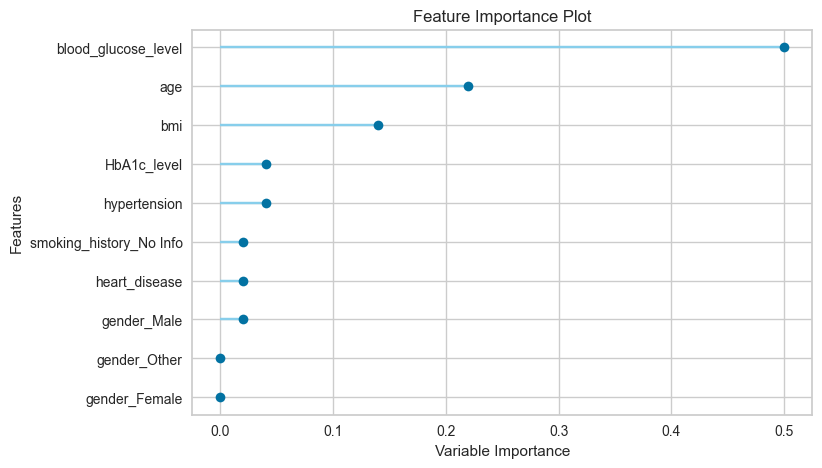

In [58]:
# plot feature importance
exp.plot_model(best, plot = 'feature')

In [87]:
import shutil
import os
from sklearn.metrics import accuracy_score

final_model = exp.finalize_model(best_tuned)
exp.save_model(final_model, 'Model/diabetes_model')

evaluation_results = exp.evaluate_model(final_model)

dest = "Results/"
os.makedirs(dest, exist_ok=True)

filename = "Confusion Matrix.png"
exp.plot_model(final_model, plot="confusion_matrix", save=True)
shutil.move(filename, os.path.join(dest, filename))
# Fazer previsões com o modelo final
predictions = exp.predict_model(final_model)
# Obter as variáveis 'target' e 'predicted' das previsões
y_true = predictions['diabetes']  # Supondo que a coluna verdadeira seja 'Label'
y_pred = predictions['prediction_label']  # Supondo que a coluna de predições seja 'Prediction'

# Calcular a acurácia
accuracy = accuracy_score(y_true, y_pred)

# Salvar a acurácia no arquivo
with open('Results/metrics.txt', 'w') as f:
    f.write(f"Acuracia do modelo: {round(accuracy, 3)}\n")


Transformation Pipeline and Model Successfully Saved


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.9125,0.9802,0.9137,0.9116,0.9127,0.8251,0.8251


In [90]:
!pytest Tests/test_diabetes_classification.py

============================= test session starts =============================
platform win32 -- Python 3.11.9, pytest-8.3.4, pluggy-1.5.0
rootdir: C:\Users\abia0\OneDrive\Área de Trabalho\Projetos\Faculdade\topicos_especiais\Diabetes-Classification\Diabetes-Prediction
plugins: anyio-4.6.2.post1, dash-2.18.2
collected 6 items

Tests\test_diabetes_classification.py ......                             [100%]

============================== 6 passed in 1.18s ==============================
